In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from adtk.visualization import plot
from adtk.detector import LevelShiftAD
from adtk.detector import OutlierDetector
from sklearn.neighbors import LocalOutlierFactor
from statsmodels.tsa.seasonal import seasonal_decompose

In [24]:
dataframe = pd.read_csv("cardox.csv", index_col="date")
dataframe.index = pd.to_datetime(dataframe.index)
dataframe

,value
date,
1958-03-01,315.71
1958-04-01,317.45
1958-05-01,317.50
1958-06-01,317.10
1958-07-01,315.86
...,...
2018-07-01,408.71
2018-08-01,406.99
2018-09-01,405.51


In [25]:
dataframe.describe()

,value
count,729.000000
mean,353.787229
std,27.547500
min,312.660000
25%,328.570000
50%,351.410000
75%,375.990000
max,411.240000


[<AxesSubplot: >]

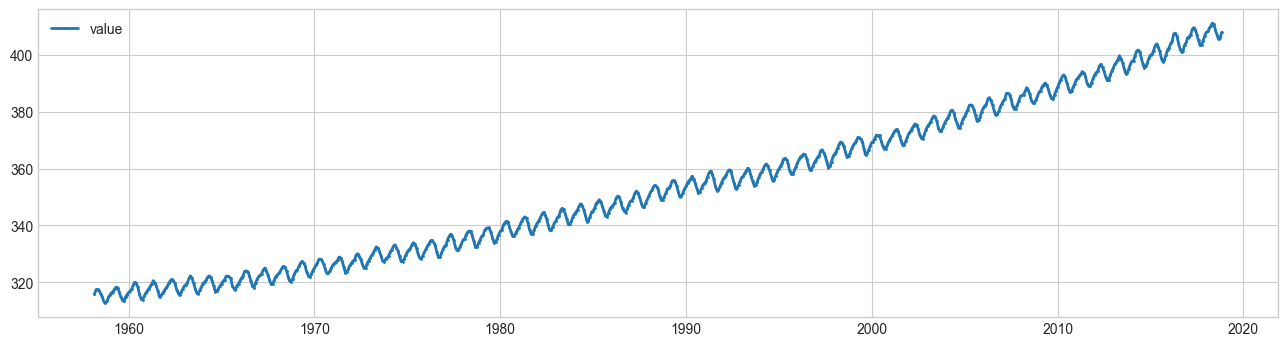

In [4]:
plot(dataframe, ts_linewidth=2)

C:\Users\Лейва\Desktop\Projects\Project_7\venv\lib\site-packages\adtk\data\_data.py:164: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t, v in time_window_end_series.iteritems():  # type: pd.Timestamp, int


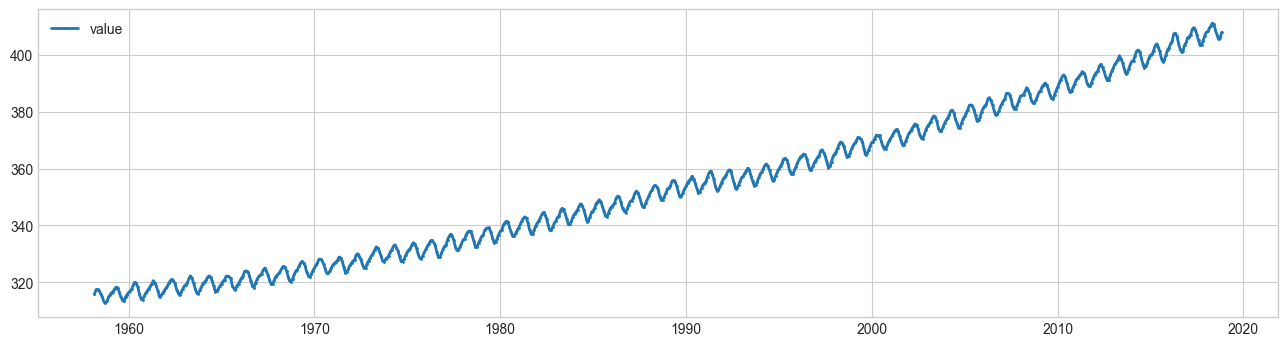

In [5]:
level_shift_ad = LevelShiftAD(c=6.0, side="both", window=10)
anomalies = level_shift_ad.fit_detect(dataframe)
plot(dataframe, anomaly=anomalies, ts_linewidth=2, anomaly_color="red");

**No anomalies detected via level shift**

C:\Users\Лейва\Desktop\Projects\Project_7\venv\lib\site-packages\adtk\data\_data.py:164: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t, v in time_window_end_series.iteritems():  # type: pd.Timestamp, int


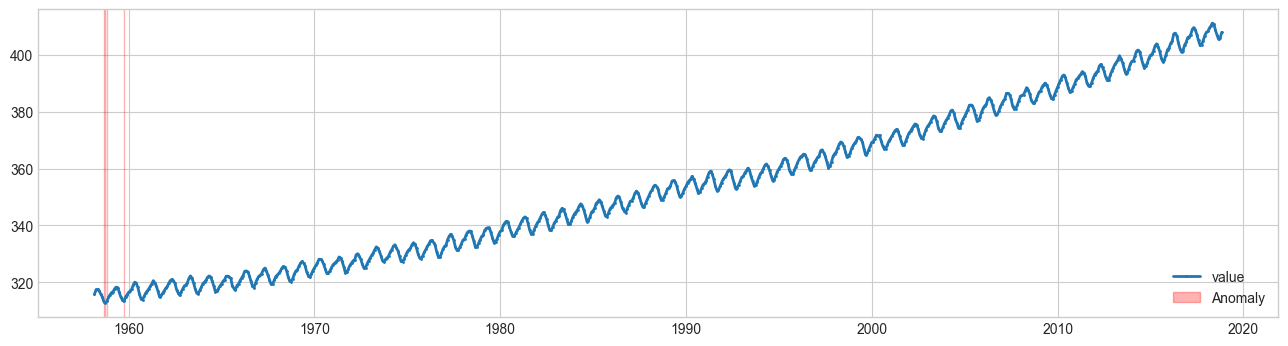

In [6]:
outlier_detector = OutlierDetector(LocalOutlierFactor())
anomalies = outlier_detector.fit_detect(dataframe)
plot(dataframe, anomaly=anomalies, ts_linewidth=2, anomaly_color="red", anomaly_alpha=0.3, curve_group="all");

In [7]:
anomalies[anomalies]

date
1958-09-01    True
1958-10-01    True
1958-11-01    True
1959-10-01    True
dtype: bool

In [8]:
def sesonal(data, s):
    plt.figure(figsize=(10,10), dpi= 100)
    for i, y in enumerate(data.index.year.unique()):
        plt.plot(list(range(1,len(data[data.index.year==y])+1)), data[data.index.year==y][data.columns[0]].values, label=y)
    plt.title("Periods Seasonality")
    plt.legend(loc="best")
    plt.show()

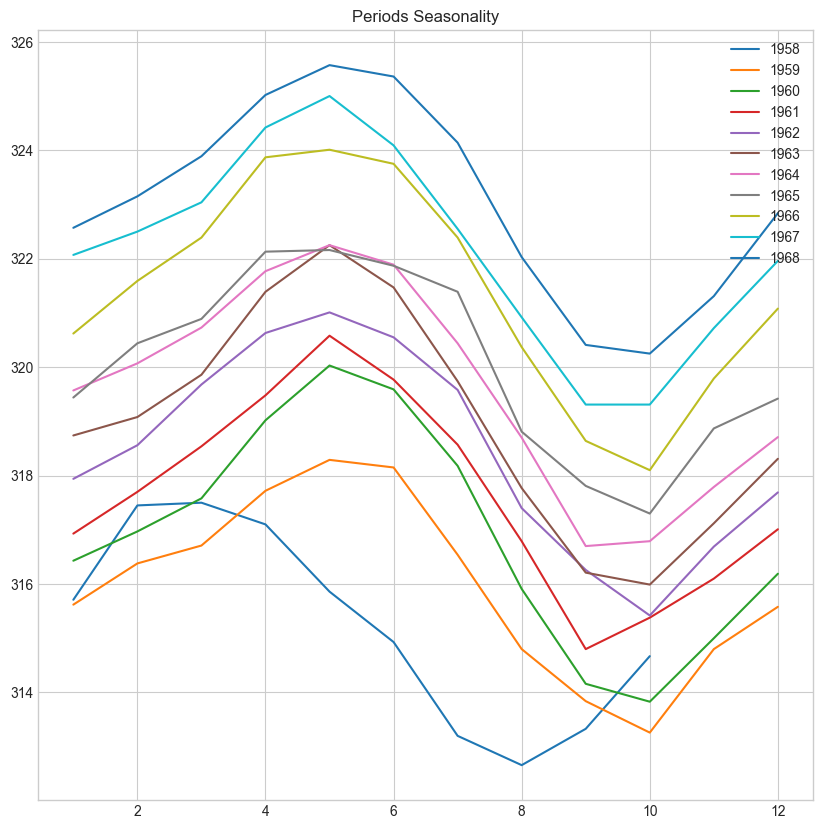

In [9]:
sesonal(dataframe["1958":"1968"], 12)

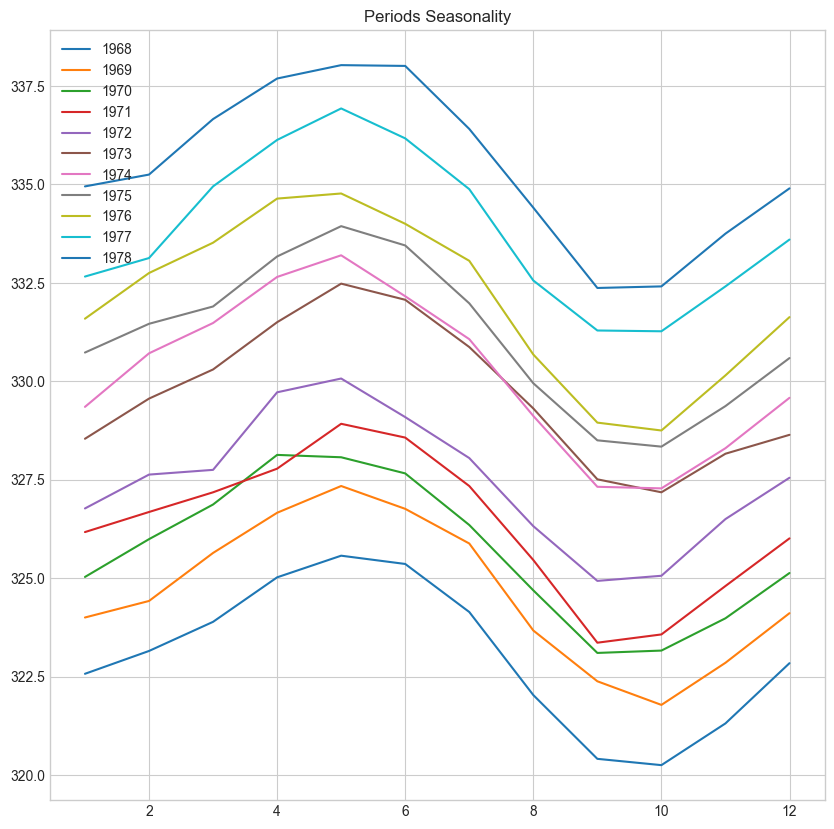

In [10]:
sesonal(dataframe["1968":"1978"], 12)

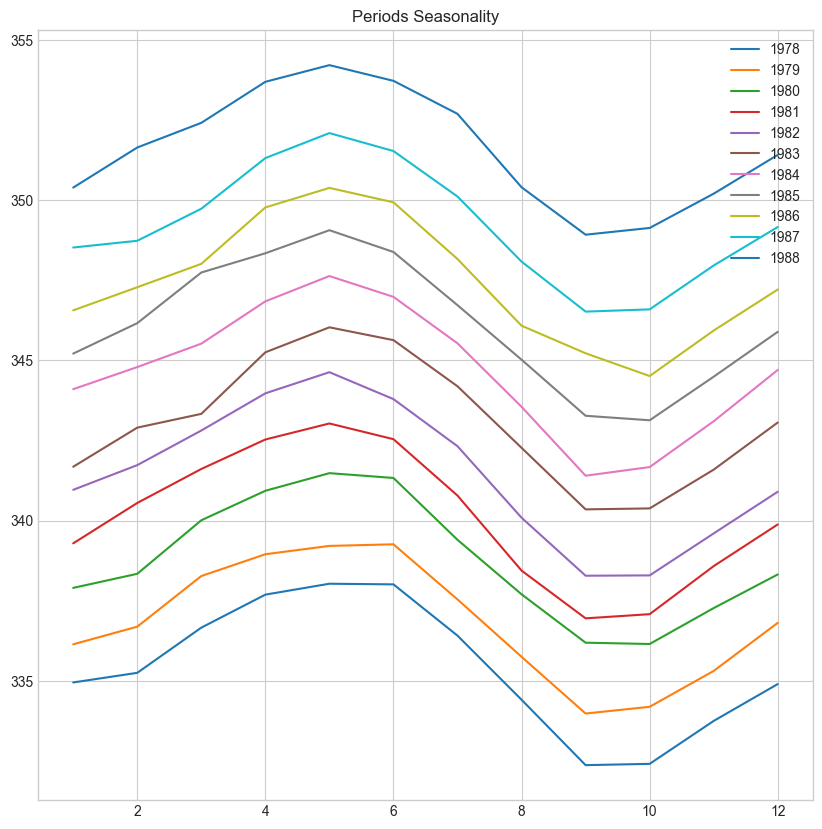

In [11]:
sesonal(dataframe["1978":"1988"], 12)

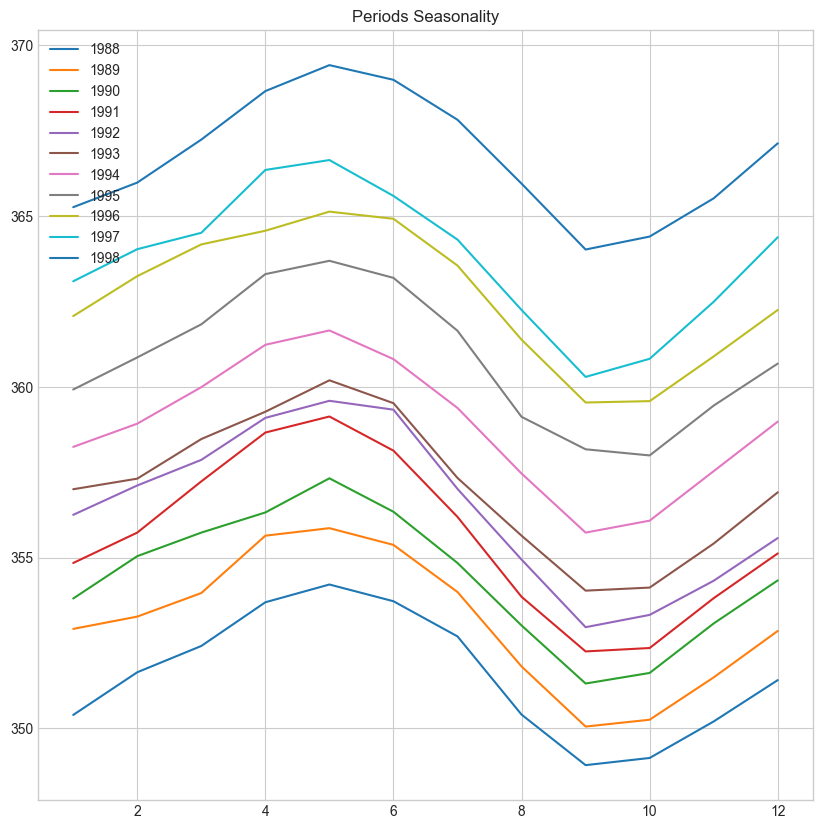

In [12]:
sesonal(dataframe["1988":"1998"], 12)

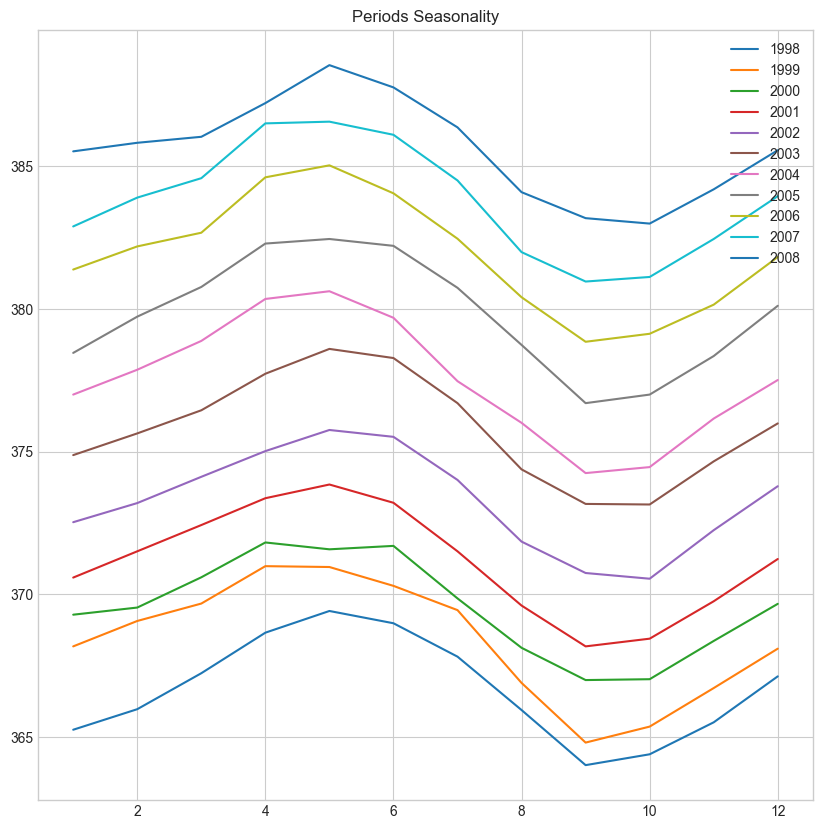

In [13]:
sesonal(dataframe["1998":"2008"], 12)

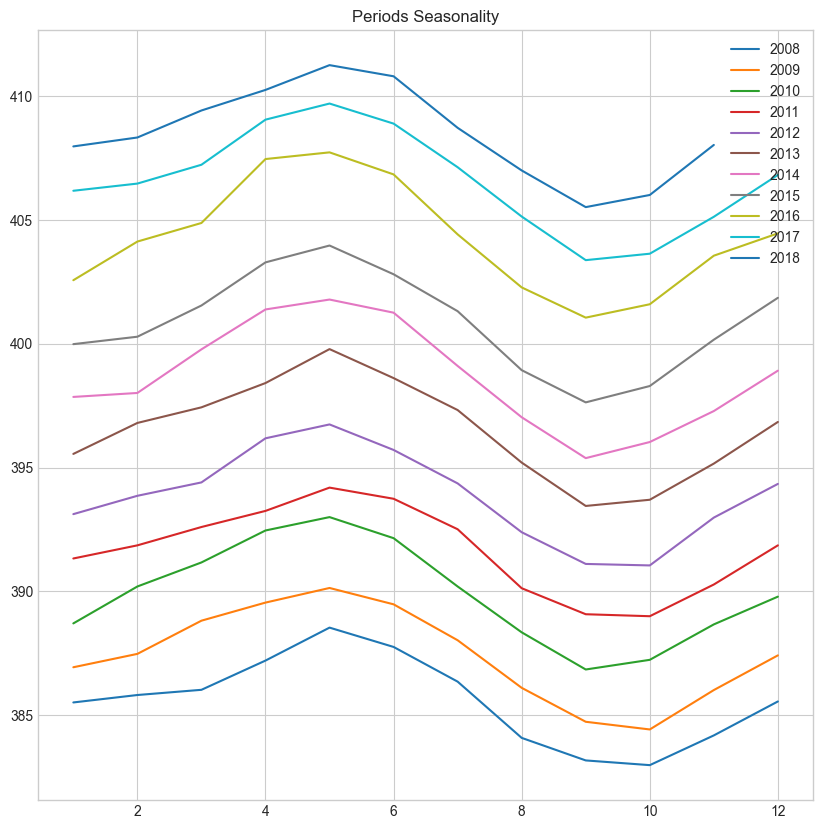

In [14]:
sesonal(dataframe["2008":"2018"], 12)

Text(0.5, 0.98, 'Multiplicative model')

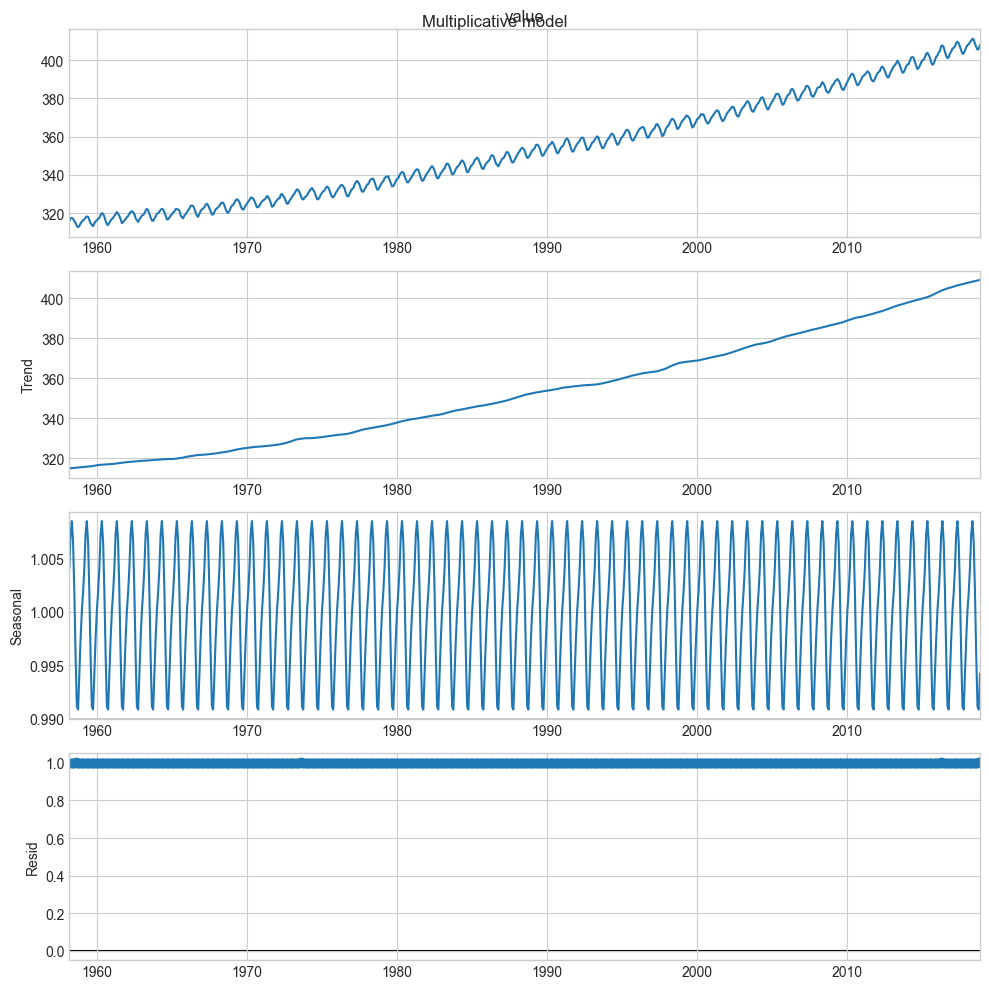

In [15]:
result_M = seasonal_decompose(dataframe.value, model="multiplicative", extrapolate_trend=12)

plt.rcParams.update({"figure.figsize": (10,10)})
result_M.plot().suptitle("Multiplicative model")

**The only problem seasonality we observe in the 1958 year. But this is due to lack of information for the first and second month of the year (we have data start from third month). As we can't get this data, we will adjust months 9 - 12 to the next year values and also fi the anomaly in 10th month of 1959**

In [19]:
dataframe.loc["1958-09-01"]=dataframe.loc["1959-09-01"]
dataframe.loc["1958-10-01"]=dataframe.loc["1960-10-01"]
dataframe.loc["1958-11-01"]=dataframe.loc["1959-11-01"]
dataframe.loc["1958-12-01"]=dataframe.loc["1959-12-01"]
dataframe.loc["1959-10-01"]=dataframe.loc["1960-10-01"]

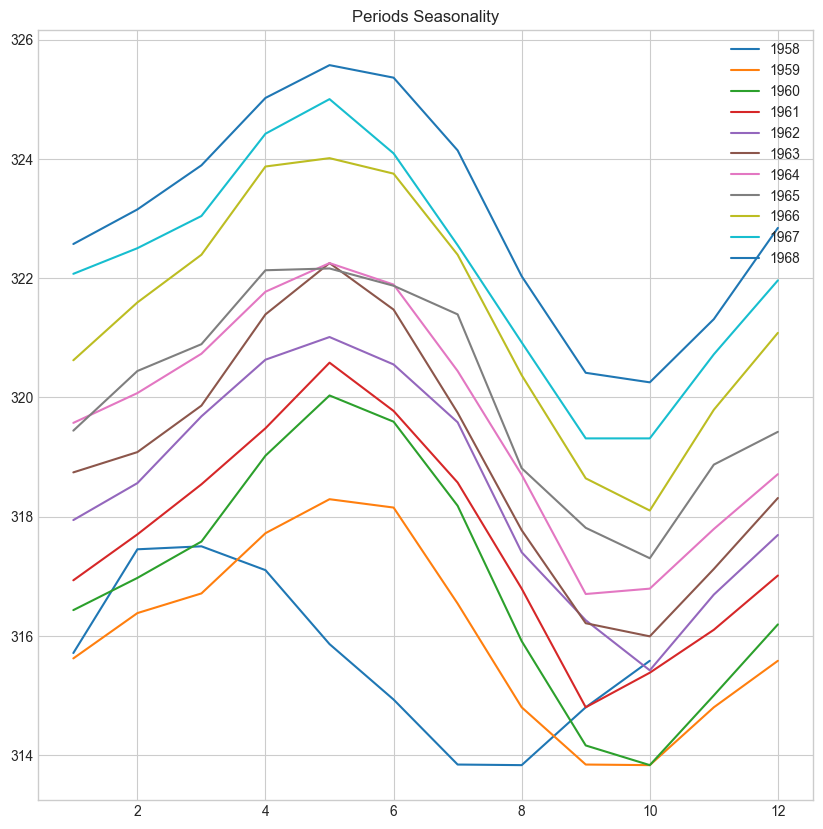

In [20]:
sesonal(dataframe["1958":"1968"], 12)

C:\Users\Лейва\Desktop\Projects\Project_7\venv\lib\site-packages\adtk\data\_data.py:164: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t, v in time_window_end_series.iteritems():  # type: pd.Timestamp, int


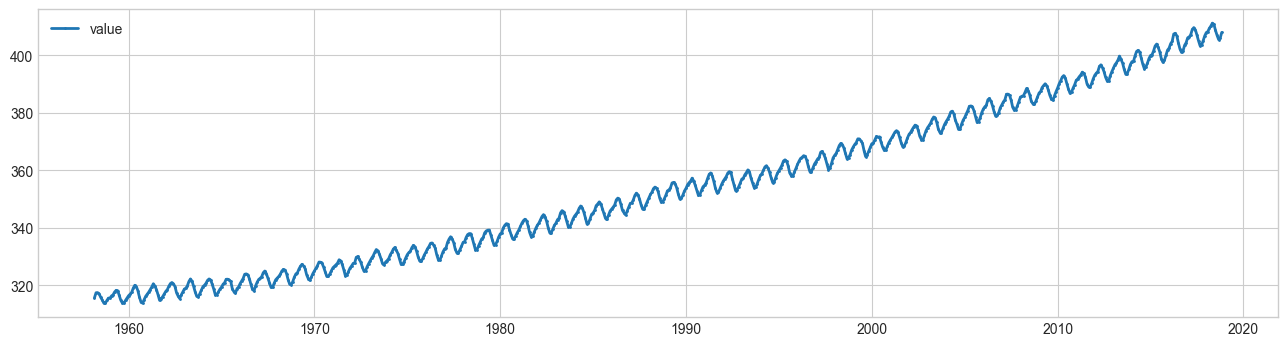

In [21]:
outlier_detector = OutlierDetector(LocalOutlierFactor())
anomalies = outlier_detector.fit_detect(dataframe)
plot(dataframe, anomaly=anomalies, ts_linewidth=2, anomaly_color="red", anomaly_alpha=0.3, curve_group="all");

**We have Trend and Seasonality, but no exogenous regressors. The SARIMA and HWES would be ideal models for our data.**